In [2]:
# IMPORT LIBRARY'S
# LIBRARYS TO DEAL WITH DATA
import pandas as pd
import numpy  as np
# LIBRARYS TO PLOT GRAPHS
from matplotlib import pyplot as plt
import seaborn as sns
# LIBRARYS TO BUILD MODELS
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import OrderedDict
from itertools import islice
from imblearn.metrics import sensitivity_specificity_support
from sklearn.linear_model import LogisticRegression

In [3]:
# CODE TO MAKE ALL COLUMNS AND ROWS DISPLAY IN NOTEPAD
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# READING INPUT FILE
telecom_df=pd.read_csv('telecom_churn_data.csv',encoding='iso-8859-1')
print('No.of Rows   :{} \nNo.of Columns:{}'.format(telecom_df.shape[0],telecom_df.shape[1]))

No.of Rows   :99999 
No.of Columns:226


In [5]:
# DISPLAYING FEW SUBJECTS
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# DATA CLEANING

#### REMOVING DATE FIELDS FROM THE DATA SET WE ARE NOT DOING ANY ANAYSIS BASED ON TIME OR DATE.THE FALLOWING COLUMNS WILL BE DROPPED 
    -- last_date_of_month     [LAST DATE OF THE MONTHS 6,7,8,9].
    -- date_of_last_rech      [LAST DATE OF THE MONTHS 6,7,8,9 WE DONE TALKTIME RECHARGE].
    -- date_of_last_rech_data [LAST DATE OF THE MONTHS 6,7,8,9 WE DONE DATA RECHARGE].

In [6]:
# DROOPING DATE AND MONTH RELATED COLUMNS 
telecom_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],
               axis=1,inplace=True)
telecom_df.shape

(99999, 214)

### MISSING OR NA VALUES TREATMENT

In [7]:
# COLUMN WISE % OF NA VALUES.
round(100*(telecom_df.isnull().sum()/telecom_df.shape[0]),3)

mobile_number          0.000
circle_id              0.000
loc_og_t2o_mou         1.018
std_og_t2o_mou         1.018
loc_ic_t2o_mou         1.018
arpu_6                 0.000
arpu_7                 0.000
arpu_8                 0.000
arpu_9                 0.000
onnet_mou_6            3.937
onnet_mou_7            3.859
onnet_mou_8            5.378
onnet_mou_9            7.745
offnet_mou_6           3.937
offnet_mou_7           3.859
offnet_mou_8           5.378
offnet_mou_9           7.745
roam_ic_mou_6          3.937
roam_ic_mou_7          3.859
roam_ic_mou_8          5.378
roam_ic_mou_9          7.745
roam_og_mou_6          3.937
roam_og_mou_7          3.859
roam_og_mou_8          5.378
roam_og_mou_9          7.745
loc_og_t2t_mou_6       3.937
loc_og_t2t_mou_7       3.859
loc_og_t2t_mou_8       5.378
loc_og_t2t_mou_9       7.745
loc_og_t2m_mou_6       3.937
loc_og_t2m_mou_7       3.859
loc_og_t2m_mou_8       5.378
loc_og_t2m_mou_9       7.745
loc_og_t2f_mou_6       3.937
loc_og_t2f_mou

#### DROPPING COLUMNS WHICH HAD NA%>74, ONLY 25% DATA IS AVILABLE IN FALLOWING COLUMNS IT'S BETTER TO DROP THESE COLUMNS THEY WILL NOT ADD ANY VALUE TO MODEL.

In [8]:
# DROPPING COLUMNS %NA > 74%
telecom_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6',
                 'max_rech_data_7','max_rech_data_8','max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                 'count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6',
                 'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                 'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8',
                 'night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'],
               axis=1,inplace=True)
telecom_df.shape

(99999, 178)

#### TOTOAL 119 COLUMNS HAVE NA VALUES.AFTER VERIFYING EACH COLUMN THE MEAN AND MEDIAN DIFFERENCE IS TOO HIGH BECAUSE HIGH VALUES EXIST BETWEEN 75% TO 100%. SO WE ARE GOING TO REPLACE NA VALUES WITH MEDIAN.

In [9]:
# WE SEE ONE COLUMN DETAILS TO UNDERSTAND ABOVE STATEMENT
telecom_df['onnet_mou_6'].describe()

count    96062.000000
mean       132.395875
std        297.207406
min          0.000000
25%          7.380000
50%         34.310000
75%        118.740000
max       7376.710000
Name: onnet_mou_6, dtype: float64

#### IN onnet_mou_6 COLUMN MEAN IS 132.395875 AND MEDIAN IS 34.310000 BETTER TO REPLACE NA VALUES WITH MEDIAN

In [10]:
# FILL ALL COLUMNS NA VALUES WITH MEDIAN OF THE RESPECTIVE COLUMNS
telecom_df.fillna(telecom_df.median(), inplace=True)

In [11]:
# CHECKING STILL ANY NA VALUES EXIST IN DATAFRAME
# NO NA VALUE EXIT IN DATASET
round(100*(telecom_df.isnull().sum()/telecom_df.shape[0]),3)

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

### IDENTIFYING HIGH VALUE CUSTOMERS

#### 80% REVENUE COME FROM TOP 20% OF CUSTOMERS, WE CONSIDER TOP 30% HVC WE NEED TO CALCULATE AVG RECHARGE FOR 6 & 7 MONTHS THEN FILTER PEOPLE WHO REACH 70  PERCENTILE OR MORE AVG VALUE WE CONSIDER HVC 

#### WE CREATE NEW COLUMN avg_rech_amt BY AVERAGE OF total_rech_amt_6 & total_rech_amt_7 COLUMNS

In [12]:
telecom_df['avg_rech_amt']=(telecom_df['total_rech_amt_6']+telecom_df['total_rech_amt_7'])/2
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12

In [13]:
telecom_df['avg_rech_amt'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_amt, dtype: float64

#### high-value customers as who have recharged with an amount more than or equal to 70th percentile of the average recharge amount

In [14]:
filter_value=telecom_df['avg_rech_amt'].quantile(0.7)
filter_value

368.5

#### 368.5 IS 70th PERCENTILE OF THE AVERAGE VALUE, SO PEOPLE WHO ARE >=70PERCENTILE  IS CONSIDER AS HVC WE FILTER ROWS BASED ON THIS CONDITION.

In [15]:
telecom_df=telecom_df[telecom_df['avg_rech_amt']>=filter_value]
telecom_df.shape

(30011, 179)

In [16]:
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,1

### TAG CHURN AND REMOVE COLUMNS WHICH USED TO REPRESENT CHURN

#### TAG THE CHURNED CUSTOMERS AS 1 AND NON CHURN AS 0 BASED ON THE FOURTH MONTH '9' THOSE WHO HAVE NOT MADE ANY CALLS (EITHER INCOMING OR OUTGOING) AND HAVE NOT USED MOBILE INTERNET EVEN ONCE IN THE 9TH MONTH

#### COLUMNS TO BE CONSIDERED 
total_ic_mou_9,
total_og_mou_9,
vol_2g_mb_9,
vol_3g_mb_9

In [17]:
# WE ASSIGN 1 TO CHURN COLUMN WHERE CUSTOMER HAD 0 VALUE FOR ABOVE 4 COLUMNS AND 0 FOR REST OF THE CUSTOMERS. 
telecom_df['churn']=np.where((telecom_df.total_ic_mou_9==0) & (telecom_df.total_og_mou_9==0) & 
                             (telecom_df.vol_2g_mb_9==0) & (telecom_df.vol_3g_mb_9==0),1,0)

In [18]:
# COUNT OF CHURN AND NON CHURN
telecom_df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [19]:
# %OF CHURN AND NON CHURN
round((telecom_df['churn'].value_counts()/telecom_df['churn'].count())*100,2)

0    91.36
1     8.64
Name: churn, dtype: float64

#### IMBALANCE WHEN THE % OF DATA POINTS AVILABLE FOR ONE CLASS IS 91% & OTHER CLASS IS 9% THERE IS IMBALANACE IN THE CLASS WHILE MODEL CREATION WE NEED TO HANDLE IMBALANCE

#### REMOVING COLUMNS WHICH RELATED TO 9TH MONTH

In [20]:
# IDENTIFYING COLUMNS WITH 9TH MONTH AND DROP THEM
telecom_df.drop(list(telecom_df.filter(regex='_9')),axis=1,inplace=True)
telecom_df.shape

(30011, 138)

In [21]:
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.2

# DATA PREPARATION

#### CHECKING FOR SKEW COLUMNS, SOME COLUMNS WILL HAVE UNIQUE VALUE AND ONE VALUE WILL HOLD LARGE % WHICH WILL NOT ADD ANY VALUE TO MODEL BETTER TO DROP THESE COLUMNS

In [22]:
# SAMPLE CODE TO GET UNIQUE VALUES COUNT IN COLUMN
round((telecom_df['loc_og_t2o_mou'].value_counts()/telecom_df.shape[0])*100,2)

0.0    100.0
Name: loc_og_t2o_mou, dtype: float64

In [23]:
# DROPPING circle_id IT HAD 100% OF 109 VALUE,IT WILL NOT ADD ANY VALUE
telecom_df.drop('circle_id',axis=1,inplace=True)

In [24]:
# DROPPING  FEW COLUMNS IT HAD 100% OF 0.0 VALUE,IT WILL NOT ADD ANY VALUE
telecom_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                 'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)

In [25]:
# DROPPING HIGH SKEW COLUMNS 
telecom_df.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8',
                'aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','og_others_8'],
               axis=1,inplace=True)

In [26]:
telecom_df.shape

(30011, 117)

## DERIVED FEATURES

#### MONTH 6 & 7 ARE GOOD PHASE OF CUSTOMER 8 MONTH IS WHERE CHURN CUSTOMER SHOW SOME DIFFERENCE

In [27]:
# CREATING NEW COLUMNS AVG OF 6 & 7 MONTHS.
telecom_df['avg_arpu']=telecom_df[['arpu_6','arpu_7']].mean(axis=1)
telecom_df['avg_onnet_mou']=telecom_df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
telecom_df['avg_offnet_mou']=telecom_df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
telecom_df['avg_roam_ic_mou']=telecom_df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
telecom_df['avg_roam_og_mou']=telecom_df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
telecom_df['avg_loc_og_t2t_mou']=telecom_df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
telecom_df['avg_loc_og_t2m_mou']=telecom_df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
telecom_df['avg_loc_og_t2f_mou']=telecom_df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
telecom_df['avg_loc_og_t2c_mou']=telecom_df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
telecom_df['avg_loc_og_mou']=telecom_df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
telecom_df['avg_std_og_t2t_mou']=telecom_df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
telecom_df['avg_std_og_t2m_mou']=telecom_df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
telecom_df['avg_std_og_t2f_mou']=telecom_df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
telecom_df['avg_std_og_mou']=telecom_df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
telecom_df['avg_isd_og_mou']=telecom_df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
telecom_df['avg_spl_og_mou']=telecom_df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
telecom_df['avg_og_others']=telecom_df[['og_others_6','og_others_7']].mean(axis=1)
telecom_df['avg_total_og_mou']=telecom_df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
telecom_df['avg_loc_ic_t2t_mou']=telecom_df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
telecom_df['avg_loc_ic_t2m_mou']=telecom_df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
telecom_df['avg_loc_ic_t2f_mou']=telecom_df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
telecom_df['avg_loc_ic_mou']=telecom_df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
telecom_df['avg_std_ic_t2t_mou']=telecom_df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
telecom_df['avg_std_ic_t2m_mou']=telecom_df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
telecom_df['avg_std_ic_t2f_mou']=telecom_df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
telecom_df['avg_std_ic_mou']=telecom_df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
telecom_df['avg_total_ic_mou']=telecom_df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
telecom_df['avg_spl_ic_mou']=telecom_df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
telecom_df['avg_isd_ic_mou']=telecom_df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
telecom_df['avg_ic_others']=telecom_df[['ic_others_6','ic_others_7']].mean(axis=1)
telecom_df['avg_total_rech_num']=telecom_df[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
telecom_df['avg_total_rech_amt']=telecom_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
telecom_df['avg_max_rech_amt']=telecom_df[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)
telecom_df['avg_last_day_rch_amt']=telecom_df[['last_day_rch_amt_6','last_day_rch_amt_7']].mean(axis=1)
telecom_df['avg_vol_2g_mb']=telecom_df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
telecom_df['avg_vol_3g_mb']=telecom_df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
telecom_df['avg_monthly_2g']=telecom_df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
telecom_df['avg_monthly_3g']=telecom_df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)

In [28]:
telecom_df.shape

(30011, 155)

#### WE CAPTURE MONTH WISE DIFFERENCE TO NEW FEATURES 

In [29]:
# DIFFERENCE BETWEEN 7th & 6th MONTH
telecom_df['onnet_mou_7_6']=telecom_df['onnet_mou_7']-telecom_df['onnet_mou_6']
telecom_df['offnet_mou_7_6']=telecom_df['offnet_mou_7']-telecom_df['offnet_mou_6']
telecom_df['roam_ic_mou_7_6']=telecom_df['roam_ic_mou_7']-telecom_df['roam_ic_mou_6']
telecom_df['roam_og_mou_7_6']=telecom_df['roam_og_mou_7']-telecom_df['roam_og_mou_6']
telecom_df['loc_og_t2t_mou_7_6']=telecom_df['loc_og_t2t_mou_7']-telecom_df['loc_og_t2t_mou_6']
telecom_df['loc_og_t2m_mou_7_6']=telecom_df['loc_og_t2m_mou_7']-telecom_df['loc_og_t2m_mou_6']
telecom_df['loc_og_t2f_mou_7_6']=telecom_df['loc_og_t2f_mou_7']-telecom_df['loc_og_t2f_mou_6']
telecom_df['loc_og_t2c_mou_7_6']=telecom_df['loc_og_t2c_mou_7']-telecom_df['loc_og_t2c_mou_6']
telecom_df['loc_og_mou_7_6']=telecom_df['loc_og_mou_7']-telecom_df['loc_og_mou_6']
telecom_df['std_og_t2t_mou_7_6']=telecom_df['std_og_t2t_mou_7']-telecom_df['std_og_t2t_mou_6']
telecom_df['std_og_t2m_mou_7_6']=telecom_df['std_og_t2m_mou_7']-telecom_df['std_og_t2m_mou_6']
telecom_df['std_og_t2f_mou_7_6']=telecom_df['std_og_t2f_mou_7']-telecom_df['std_og_t2f_mou_6']
telecom_df['std_og_mou_7_6']=telecom_df['std_og_mou_7']-telecom_df['std_og_mou_6']
telecom_df['isd_og_mou_7_6']=telecom_df['isd_og_mou_7']-telecom_df['isd_og_mou_6']
telecom_df['spl_og_mou_7_6']=telecom_df['spl_og_mou_7']-telecom_df['spl_og_mou_6']
telecom_df['og_others_7_6']=telecom_df['og_others_7']-telecom_df['og_others_6']
telecom_df['total_og_mou_7_6']=telecom_df['total_og_mou_7']-telecom_df['total_og_mou_6']
telecom_df['loc_ic_t2t_mou_7_6']=telecom_df['loc_ic_t2t_mou_7']-telecom_df['loc_ic_t2t_mou_6']
telecom_df['loc_ic_t2m_mou_7_6']=telecom_df['loc_ic_t2m_mou_7']-telecom_df['loc_ic_t2m_mou_6']
telecom_df['loc_ic_t2f_mou_7_6']=telecom_df['loc_ic_t2f_mou_7']-telecom_df['loc_ic_t2f_mou_6']
telecom_df['loc_ic_mou_7_6']=telecom_df['loc_ic_mou_7']-telecom_df['loc_ic_mou_6']
telecom_df['std_ic_t2t_mou_7_6']=telecom_df['std_ic_t2t_mou_7']-telecom_df['std_ic_t2t_mou_6']
telecom_df['std_ic_t2m_mou_7_6']=telecom_df['std_ic_t2m_mou_7']-telecom_df['std_ic_t2m_mou_6']
telecom_df['std_ic_t2f_mou_7_6']=telecom_df['std_ic_t2f_mou_7']-telecom_df['std_ic_t2f_mou_6']
telecom_df['std_ic_mou_7_6']=telecom_df['std_ic_mou_7']-telecom_df['std_ic_mou_6']
telecom_df['total_ic_mou_7_6']=telecom_df['total_ic_mou_7']-telecom_df['total_ic_mou_6']
telecom_df['spl_ic_mou_7_6']=telecom_df['spl_ic_mou_7']-telecom_df['spl_ic_mou_6']
telecom_df['isd_ic_mou_7_6']=telecom_df['isd_ic_mou_7']-telecom_df['isd_ic_mou_6']
telecom_df['ic_others_7_6']=telecom_df['ic_others_7']-telecom_df['ic_others_6']
telecom_df['total_rech_num_7_6']=telecom_df['total_rech_num_7']-telecom_df['total_rech_num_6']
telecom_df['total_rech_amt_7_6']=telecom_df['total_rech_amt_7']-telecom_df['total_rech_amt_6']
telecom_df['max_rech_amt_7_6']=telecom_df['max_rech_amt_7']-telecom_df['max_rech_amt_6']
telecom_df['last_day_rch_amt_7_6']=telecom_df['last_day_rch_amt_7']-telecom_df['last_day_rch_amt_6']
telecom_df['vol_2g_mb_7_6']=telecom_df['vol_2g_mb_7']-telecom_df['vol_2g_mb_6']
telecom_df['vol_3g_mb_7_6']=telecom_df['vol_3g_mb_7']-telecom_df['vol_3g_mb_6']
telecom_df['monthly_2g_7_6']=telecom_df['monthly_2g_7']-telecom_df['monthly_2g_6']
telecom_df['monthly_3g_7_6']=telecom_df['monthly_3g_7']-telecom_df['monthly_3g_6']

In [30]:
# DIFFERENCE BETWEEN 8th & 7th MONTH
telecom_df['onnet_mou_8_7']=telecom_df['onnet_mou_8']-telecom_df['onnet_mou_7']
telecom_df['offnet_mou_8_7']=telecom_df['offnet_mou_8']-telecom_df['offnet_mou_7']
telecom_df['roam_ic_mou_8_7']=telecom_df['roam_ic_mou_8']-telecom_df['roam_ic_mou_7']
telecom_df['roam_og_mou_8_7']=telecom_df['roam_og_mou_8']-telecom_df['roam_og_mou_7']
telecom_df['loc_og_t2t_mou_8_7']=telecom_df['loc_og_t2t_mou_8']-telecom_df['loc_og_t2t_mou_7']
telecom_df['loc_og_t2m_mou_8_7']=telecom_df['loc_og_t2m_mou_8']-telecom_df['loc_og_t2m_mou_7']
telecom_df['loc_og_t2f_mou_8_7']=telecom_df['loc_og_t2f_mou_8']-telecom_df['loc_og_t2f_mou_7']
telecom_df['loc_og_t2c_mou_8_7']=telecom_df['loc_og_t2c_mou_8']-telecom_df['loc_og_t2c_mou_7']
telecom_df['loc_og_mou_8_7']=telecom_df['loc_og_mou_8']-telecom_df['loc_og_mou_7']
telecom_df['std_og_t2t_mou_8_7']=telecom_df['std_og_t2t_mou_8']-telecom_df['std_og_t2t_mou_7']
telecom_df['std_og_t2m_mou_8_7']=telecom_df['std_og_t2m_mou_8']-telecom_df['std_og_t2m_mou_7']
telecom_df['std_og_t2f_mou_8_7']=telecom_df['std_og_t2f_mou_8']-telecom_df['std_og_t2f_mou_7']
telecom_df['std_og_mou_8_7']=telecom_df['std_og_mou_8']-telecom_df['std_og_mou_7']
telecom_df['isd_og_mou_8_7']=telecom_df['isd_og_mou_8']-telecom_df['isd_og_mou_7']
telecom_df['spl_og_mou_8_7']=telecom_df['spl_og_mou_8']-telecom_df['spl_og_mou_7']
telecom_df['total_og_mou_8_7']=telecom_df['total_og_mou_8']-telecom_df['total_og_mou_7']
telecom_df['loc_ic_t2t_mou_8_7']=telecom_df['loc_ic_t2t_mou_8']-telecom_df['loc_ic_t2t_mou_7']
telecom_df['loc_ic_t2m_mou_8_7']=telecom_df['loc_ic_t2m_mou_8']-telecom_df['loc_ic_t2m_mou_7']
telecom_df['loc_ic_t2f_mou_8_7']=telecom_df['loc_ic_t2f_mou_8']-telecom_df['loc_ic_t2f_mou_7']
telecom_df['loc_ic_mou_8_7']=telecom_df['loc_ic_mou_8']-telecom_df['loc_ic_mou_7']
telecom_df['std_ic_t2t_mou_8_7']=telecom_df['std_ic_t2t_mou_8']-telecom_df['std_ic_t2t_mou_7']
telecom_df['std_ic_t2m_mou_8_7']=telecom_df['std_ic_t2m_mou_8']-telecom_df['std_ic_t2m_mou_7']
telecom_df['std_ic_t2f_mou_8_7']=telecom_df['std_ic_t2f_mou_8']-telecom_df['std_ic_t2f_mou_7']
telecom_df['std_ic_mou_8_7']=telecom_df['std_ic_mou_8']-telecom_df['std_ic_mou_7']
telecom_df['total_ic_mou_8_7']=telecom_df['total_ic_mou_8']-telecom_df['total_ic_mou_7']
telecom_df['spl_ic_mou_8_7']=telecom_df['spl_ic_mou_8']-telecom_df['spl_ic_mou_7']
telecom_df['isd_ic_mou_8_7']=telecom_df['isd_ic_mou_8']-telecom_df['isd_ic_mou_7']
telecom_df['ic_others_8_7']=telecom_df['ic_others_8']-telecom_df['ic_others_7']
telecom_df['total_rech_num_8_7']=telecom_df['total_rech_num_8']-telecom_df['total_rech_num_7']
telecom_df['total_rech_amt_8_7']=telecom_df['total_rech_amt_8']-telecom_df['total_rech_amt_7']
telecom_df['max_rech_amt_8_7']=telecom_df['max_rech_amt_8']-telecom_df['max_rech_amt_7']
telecom_df['last_day_rch_amt_8_7']=telecom_df['last_day_rch_amt_8']-telecom_df['last_day_rch_amt_7']
telecom_df['vol_2g_mb_8_7']=telecom_df['vol_2g_mb_8']-telecom_df['vol_2g_mb_7']
telecom_df['vol_3g_mb_8_7']=telecom_df['vol_3g_mb_8']-telecom_df['vol_3g_mb_7']
telecom_df['monthly_2g_8_7']=telecom_df['monthly_2g_8']-telecom_df['monthly_2g_7']
telecom_df['monthly_3g_8_7']=telecom_df['monthly_3g_8']-telecom_df['monthly_3g_7']

In [31]:
telecom_df.shape

(30011, 228)

#### WE GOT AVERAGE FEATURE FOR BOTH 6 AND 7 MONTH & DIFFERENCE BETWEEN MONTHS SO WE CAN DROP RAW COLUMNS

In [32]:
# DROPPING RAW COLUMNS OF 6th & 7th MONTH
telecom_df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7',
                 'roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
                 'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7',
                 'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6',
                 'std_og_t2f_mou_7','std_og_mou_6','std_og_mou_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7',
                 'og_others_6','og_others_7','total_og_mou_6','total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
                 'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7',
                 'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2f_mou_6',
                 'std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6',
                 'spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','total_rech_num_6',
                 'total_rech_num_7','total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7',
                 'last_day_rch_amt_6','last_day_rch_amt_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7',
                 'monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7'],
                axis=1,inplace=True)

In [33]:
telecom_df.shape

(30011, 152)

#### CREATING A NEW FEATURE BASED ON 8th MONTH AND AVERAGE OF 6 & 7th MONTH. WE MARK 0 IF 8>AVG(6,7) & 1 IF 8<AVG(6,7)

In [34]:
telecom_df['flag_arpu']=np.where((telecom_df['arpu_8'] > telecom_df['avg_arpu']), 0, 1)
telecom_df['flag_onnet_mou']=np.where((telecom_df['onnet_mou_8'] > telecom_df['avg_onnet_mou']), 0, 1)
telecom_df['flag_offnet_mou']=np.where((telecom_df['offnet_mou_8'] > telecom_df['avg_offnet_mou']), 0, 1)
telecom_df['flag_roam_ic_mou']=np.where((telecom_df['roam_ic_mou_8'] > telecom_df['avg_roam_ic_mou']), 0, 1)
telecom_df['flag_roam_og_mou']=np.where((telecom_df['roam_og_mou_8'] > telecom_df['avg_roam_og_mou']), 0, 1)
telecom_df['flag_loc_og_t2t_mou']=np.where((telecom_df['loc_og_t2t_mou_8'] > telecom_df['avg_loc_og_t2t_mou']), 0, 1)
telecom_df['flag_loc_og_t2m_mou']=np.where((telecom_df['loc_og_t2m_mou_8'] > telecom_df['avg_loc_og_t2m_mou']), 0, 1)
telecom_df['flag_loc_og_t2f_mou']=np.where((telecom_df['loc_og_t2f_mou_8'] > telecom_df['avg_loc_og_t2f_mou']), 0, 1)
telecom_df['flag_loc_og_t2c_mou']=np.where((telecom_df['loc_og_t2c_mou_8'] > telecom_df['avg_loc_og_t2c_mou']), 0, 1)
telecom_df['flag_loc_og_mou']=np.where((telecom_df['loc_og_mou_8'] > telecom_df['avg_loc_og_mou']), 0, 1)
telecom_df['flag_std_og_t2t_mou']=np.where((telecom_df['std_og_t2t_mou_8'] > telecom_df['avg_std_og_t2t_mou']), 0, 1)
telecom_df['flag_std_og_t2m_mou']=np.where((telecom_df['std_og_t2m_mou_8'] > telecom_df['avg_std_og_t2m_mou']), 0, 1)
telecom_df['flag_std_og_t2f_mou']=np.where((telecom_df['std_og_t2f_mou_8'] > telecom_df['avg_std_og_t2f_mou']), 0, 1)
telecom_df['flag_std_og_mou']=np.where((telecom_df['std_og_mou_8'] > telecom_df['avg_std_og_mou']), 0, 1)
telecom_df['flag_isd_og_mou']=np.where((telecom_df['isd_og_mou_8'] > telecom_df['avg_isd_og_mou']), 0, 1)
telecom_df['flag_spl_og_mou']=np.where((telecom_df['spl_og_mou_8'] > telecom_df['avg_spl_og_mou']), 0, 1)
telecom_df['flag_total_og_mou']=np.where((telecom_df['total_og_mou_8'] > telecom_df['avg_total_og_mou']), 0, 1)
telecom_df['flag_loc_ic_t2t_mou']=np.where((telecom_df['loc_ic_t2t_mou_8'] > telecom_df['avg_loc_ic_t2t_mou']), 0, 1)
telecom_df['flag_loc_ic_t2m_mou']=np.where((telecom_df['loc_ic_t2m_mou_8'] > telecom_df['avg_loc_ic_t2m_mou']), 0, 1)
telecom_df['flag_loc_ic_t2f_mou']=np.where((telecom_df['loc_ic_t2f_mou_8'] > telecom_df['avg_loc_ic_t2f_mou']), 0, 1)
telecom_df['flag_loc_ic_mou']=np.where((telecom_df['loc_ic_mou_8'] > telecom_df['avg_loc_ic_mou']), 0, 1)
telecom_df['flag_std_ic_t2t_mou']=np.where((telecom_df['std_ic_t2t_mou_8'] > telecom_df['avg_std_ic_t2t_mou']), 0, 1)
telecom_df['flag_std_ic_t2m_mou']=np.where((telecom_df['std_ic_t2m_mou_8'] > telecom_df['avg_std_ic_t2m_mou']), 0, 1)
telecom_df['flag_std_ic_t2f_mou']=np.where((telecom_df['std_ic_t2f_mou_8'] > telecom_df['avg_std_ic_t2f_mou']), 0, 1)
telecom_df['flag_std_ic_mou']=np.where((telecom_df['std_ic_mou_8'] > telecom_df['avg_std_ic_mou']), 0, 1)
telecom_df['flag_total_ic_mou']=np.where((telecom_df['total_ic_mou_8'] > telecom_df['avg_total_ic_mou']), 0, 1)
telecom_df['flag_spl_ic_mou']=np.where((telecom_df['spl_ic_mou_8'] > telecom_df['avg_spl_ic_mou']), 0, 1)
telecom_df['flag_isd_ic_mou']=np.where((telecom_df['isd_ic_mou_8'] > telecom_df['avg_isd_ic_mou']), 0, 1)
telecom_df['flag_ic_others']=np.where((telecom_df['ic_others_8'] > telecom_df['avg_ic_others']), 0, 1)
telecom_df['flag_total_rech_num']=np.where((telecom_df['total_rech_num_8'] > telecom_df['avg_total_rech_num']), 0, 1)
telecom_df['flag_total_rech_amt']=np.where((telecom_df['total_rech_amt_8'] > telecom_df['avg_total_rech_amt']), 0, 1)
telecom_df['flag_max_rech_amt']=np.where((telecom_df['max_rech_amt_8'] > telecom_df['avg_max_rech_amt']), 0, 1)
telecom_df['flag_last_day_rch_amt']=np.where((telecom_df['last_day_rch_amt_8'] > telecom_df['avg_last_day_rch_amt']), 0, 1)
telecom_df['flag_vol_2g_mb']=np.where((telecom_df['vol_2g_mb_8'] > telecom_df['avg_vol_2g_mb']), 0, 1)
telecom_df['flag_vol_3g_mb']=np.where((telecom_df['vol_3g_mb_8'] > telecom_df['avg_vol_3g_mb']), 0, 1)
telecom_df['flag_monthly_2g']=np.where((telecom_df['monthly_2g_8'] > telecom_df['avg_monthly_2g']), 0, 1)
telecom_df['flag_monthly_3g']=np.where((telecom_df['monthly_3g_8'] > telecom_df['avg_monthly_3g']), 0, 1)

In [35]:
telecom_df.shape

(30011, 189)

In [36]:
telecom_df.head(5)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,aon,avg_rech_amt,churn,avg_arpu,avg_onnet_mou,avg_offnet_mou,avg_roam_ic_mou,avg_roam_og_mou,avg_loc_og_t2t_mou,avg_loc_og_t2m_mou,avg_loc_og_t2f_mou,avg_loc_og_t2c_mou,avg_loc_og_mou,avg_std_og_t2t_mou,avg_std_og_t2m_mou,avg_std_og_t2f_mou,avg_std_og_mou,avg_isd_og_mou,avg_spl_og_mou,avg_og_others,avg_total_og_mou,avg_loc_ic_t2t_mou,avg_loc_ic_t2m_mou,avg_loc_ic_t2f_mou,avg_loc_ic_mou,avg_std_ic_t2t_mou,avg_std_ic_t2m_mou,avg_std_ic_t2f_mou,avg_std_ic_mou,avg_total_ic_mou,avg_spl_ic_mou,avg_isd_ic_mou,avg_ic_others,avg_total_rech_num,avg_total_rech_amt,avg_max_rech_amt,avg_last_day_rch_amt,avg_vol_2g_mb,avg_vol_3g_mb,avg_monthly_2g,avg_monthly_3g,onnet_mou_7_6,offnet_mou_7_6,roam_ic_mou_7_6,roam_og_mou_7_6,loc_og_t2t_mou_7_6,loc_og_t2m_mou_7_6,loc_og_t2f_mou_7_6,loc_og_t2c_mou_7_6,loc_og_mou_7_6,std_og_t2t_mou_7_6,std_og_t2m_mou_7_6,std_og_t2f_mou_7_6,std_og_mou_7_6,isd_og_mou_7_6,spl_og_mou_7_6,og_others_7_6,total_og_mou_7_6,loc_ic_t2t_mou_7_6,loc_ic_t2m_mou_7_6,loc_ic_t2f_mou_7_6,loc_ic_mou_7_6,std_ic_t2t_mou_7_6,std_ic_t2m_mou_7_6,std_ic_t2f_mou_7_6,std_ic_mou_7_6,total_ic_mou_7_6,spl_ic_mou_7_6,isd_ic_mou_7_6,ic_others_7_6,total_rech_num_7_6,total_rech_amt_7_6,max_rech_amt_7_6,last_day_rch_amt_7_6,vol_2g_mb_7_6,vol_3g_mb_7_6,monthly_2g_7_6,monthly_3g_7_6,onnet_mou_8_7,offnet_mou_8_7,roam_ic_mou_8_7,roam_og_mou_8_7,loc_og_t2t_mou_8_7,loc_og_t2m_mou_8_7,loc_og_t2f_mou_8_7,loc_og_t2c_mou_8_7,loc_og_mou_8_7,std_og_t2t_mou_8_7,std_og_t2m_mou_8_7,std_og_t2f_mou_8_7,std_og_mou_8_7,isd_og_mou_8_7,spl_og_mou_8_7,total_og_mou_8_7,loc_ic_t2t_mou_8_7,loc_ic_t2m_mou_8_7,loc_ic_t2f_mou_8_7,loc_ic_mou_8_7,std_ic_t2t_mou_8_7,std_ic_t2m_mou_8_7,std_ic_t2f_mou_8_7,std_ic_mou_8_7,total_ic_mou_8_7,spl_ic_mou_8_7,isd_ic_mou_8_7,ic_others_8_7,total_rech_num_8_7,total_rech_amt_8_7,max_rech_amt_8_7,last_day_rch_amt_8_7,vol_2g_mb_8_7,vol_3g_mb_8_7,monthly_2g_8_7,monthly_3g_8_7,flag_arpu,flag_onnet_mou,flag_offnet_mou,flag_roam_ic_mou,flag_roam_og_mou,flag_loc_og_t2t_mou,flag_loc_og_t2m_mou,flag_loc_og_t2f_mou,flag_loc_og_t2c_mou,flag_loc_og_mou,flag_std_og_t2t_mou,flag_std_og_t2m_mou,flag_std_og_t2f_mou,flag_std_og_mou,flag_isd_og_mou,flag_spl_og_mou,flag_total_og_mou,flag_loc_ic_t2t_mou,flag_loc_ic_t2m_mou,flag_loc_ic_t2f_mou,flag_loc_ic_mou,flag_std_ic_t2t_mou,flag_std_ic_t2m_mou,flag_std_ic_t2f_mou,flag_std_ic_mou,flag_total_ic_mou,flag_spl_ic_mou,flag_isd_ic_mou,flag_ic_others,flag_total_rech_num,flag_total_rech_amt,flag_max_rech_amt,flag_last_day_rch_amt,flag_vol_2g_mb,flag_vol_3g_mb,flag_monthly_2g,flag_monthly_3g
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,802,1185.0,1,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,-3.16,113.73,17.26,-11.15,-20.01,138.75,-6.99,0.0,111.75,18.99,-18.13,13.42,14.28,0.18,-4.50,0.00,121.71,-25.88,3.93,-50.70,-72.65,-25.06,35.55,-17.95,-7.46,-68.42,-0.21,12.47,-0.55,0,-790,-790,0,0.0,0.00,0,0,-2.39,-241.25,-1.85,25.47,8.90,-285.10,-1.91,0.00,-278.12,-11.28,17.38,-3.4,2.70,9.83,6.50,-259.08,-4.95,-100.30,-61.93,-167.19,18.56,14.34,-12.03,20.86,-129.30,0.0,17.06,-0.05,2,2848,790,779,0.0

In [37]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 189 entries, mobile_number to flag_monthly_3g
dtypes: float64(131), int32(38), int64(20)
memory usage: 39.2 MB


#### CONVERTING DATA TYPES TO CATAGORICAL DATA TYPE FOR COLUMNS WHICH HAD CATAGORICAL INFORMATION

In [38]:
telecom_df['churn']=telecom_df['churn'].astype('category')
telecom_df['flag_arpu']=telecom_df['flag_arpu'].astype('category')
telecom_df['flag_onnet_mou']=telecom_df['flag_onnet_mou'].astype('category')
telecom_df['flag_offnet_mou']=telecom_df['flag_offnet_mou'].astype('category')
telecom_df['flag_roam_ic_mou']=telecom_df['flag_roam_ic_mou'].astype('category')
telecom_df['flag_roam_og_mou']=telecom_df['flag_roam_og_mou'].astype('category')
telecom_df['flag_loc_og_t2t_mou']=telecom_df['flag_loc_og_t2t_mou'].astype('category')
telecom_df['flag_loc_og_t2m_mou']=telecom_df['flag_loc_og_t2m_mou'].astype('category')
telecom_df['flag_loc_og_t2f_mou']=telecom_df['flag_loc_og_t2f_mou'].astype('category')
telecom_df['flag_loc_og_t2c_mou']=telecom_df['flag_loc_og_t2c_mou'].astype('category')
telecom_df['flag_loc_og_mou']=telecom_df['flag_loc_og_mou'].astype('category')
telecom_df['flag_std_og_t2t_mou']=telecom_df['flag_std_og_t2t_mou'].astype('category')
telecom_df['flag_std_og_t2m_mou']=telecom_df['flag_std_og_t2m_mou'].astype('category')
telecom_df['flag_std_og_t2f_mou']=telecom_df['flag_std_og_t2f_mou'].astype('category')
telecom_df['flag_std_og_mou']=telecom_df['flag_std_og_mou'].astype('category')
telecom_df['flag_isd_og_mou']=telecom_df['flag_isd_og_mou'].astype('category')
telecom_df['flag_spl_og_mou']=telecom_df['flag_spl_og_mou'].astype('category')
telecom_df['flag_total_og_mou']=telecom_df['flag_total_og_mou'].astype('category')
telecom_df['flag_loc_ic_t2t_mou']=telecom_df['flag_loc_ic_t2t_mou'].astype('category')
telecom_df['flag_loc_ic_t2m_mou']=telecom_df['flag_loc_ic_t2m_mou'].astype('category')
telecom_df['flag_loc_ic_t2f_mou']=telecom_df['flag_loc_ic_t2f_mou'].astype('category')
telecom_df['flag_loc_ic_mou']=telecom_df['flag_loc_ic_mou'].astype('category')
telecom_df['flag_std_ic_t2t_mou']=telecom_df['flag_std_ic_t2t_mou'].astype('category')
telecom_df['flag_std_ic_t2m_mou']=telecom_df['flag_std_ic_t2m_mou'].astype('category')
telecom_df['flag_std_ic_t2f_mou']=telecom_df['flag_std_ic_t2f_mou'].astype('category')
telecom_df['flag_std_ic_mou']=telecom_df['flag_std_ic_mou'].astype('category')
telecom_df['flag_total_ic_mou']=telecom_df['flag_total_ic_mou'].astype('category')
telecom_df['flag_spl_ic_mou']=telecom_df['flag_spl_ic_mou'].astype('category')
telecom_df['flag_isd_ic_mou']=telecom_df['flag_isd_ic_mou'].astype('category')
telecom_df['flag_ic_others']=telecom_df['flag_ic_others'].astype('category')
telecom_df['flag_total_rech_num']=telecom_df['flag_total_rech_num'].astype('category')
telecom_df['flag_total_rech_amt']=telecom_df['flag_total_rech_amt'].astype('category')
telecom_df['flag_max_rech_amt']=telecom_df['flag_max_rech_amt'].astype('category')
telecom_df['flag_last_day_rch_amt']=telecom_df['flag_last_day_rch_amt'].astype('category')  
telecom_df['flag_vol_2g_mb']=telecom_df['flag_vol_2g_mb'].astype('category')
telecom_df['flag_vol_3g_mb']=telecom_df['flag_vol_3g_mb'].astype('category')
telecom_df['flag_monthly_2g']=telecom_df['flag_monthly_2g'].astype('category')
telecom_df['flag_monthly_3g']=telecom_df['flag_monthly_3g'].astype('category')

In [39]:
telecom_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 189 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   mobile_number          30011 non-null  int64   
 1   arpu_8                 30011 non-null  float64 
 2   onnet_mou_8            30011 non-null  float64 
 3   offnet_mou_8           30011 non-null  float64 
 4   roam_ic_mou_8          30011 non-null  float64 
 5   roam_og_mou_8          30011 non-null  float64 
 6   loc_og_t2t_mou_8       30011 non-null  float64 
 7   loc_og_t2m_mou_8       30011 non-null  float64 
 8   loc_og_t2f_mou_8       30011 non-null  float64 
 9   loc_og_t2c_mou_8       30011 non-null  float64 
 10  loc_og_mou_8           30011 non-null  float64 
 11  std_og_t2t_mou_8       30011 non-null  float64 
 12  std_og_t2m_mou_8       30011 non-null  float64 
 13  std_og_t2f_mou_8       30011 non-null  float64 
 14  std_og_mou_8           30011 non-null

# EDA

Text(0.5, 1.0, 'Churn and Non Churn plot')

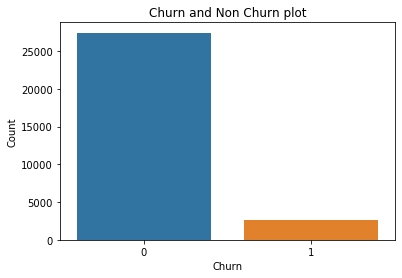

In [40]:
# CHURN BAR PLOT
sns.countplot(x='churn',data=telecom_df)
plt.ylabel('Count')
plt.xlabel('Churn')
plt.title('Churn and Non Churn plot')

#### PLOTTING GRAPHS FOR EACH COLUMN WE CAN OBSERVE CHURN AND NON CHURN DATA IN BELOW  GRAPH HOW THEY DISTRIBUTED

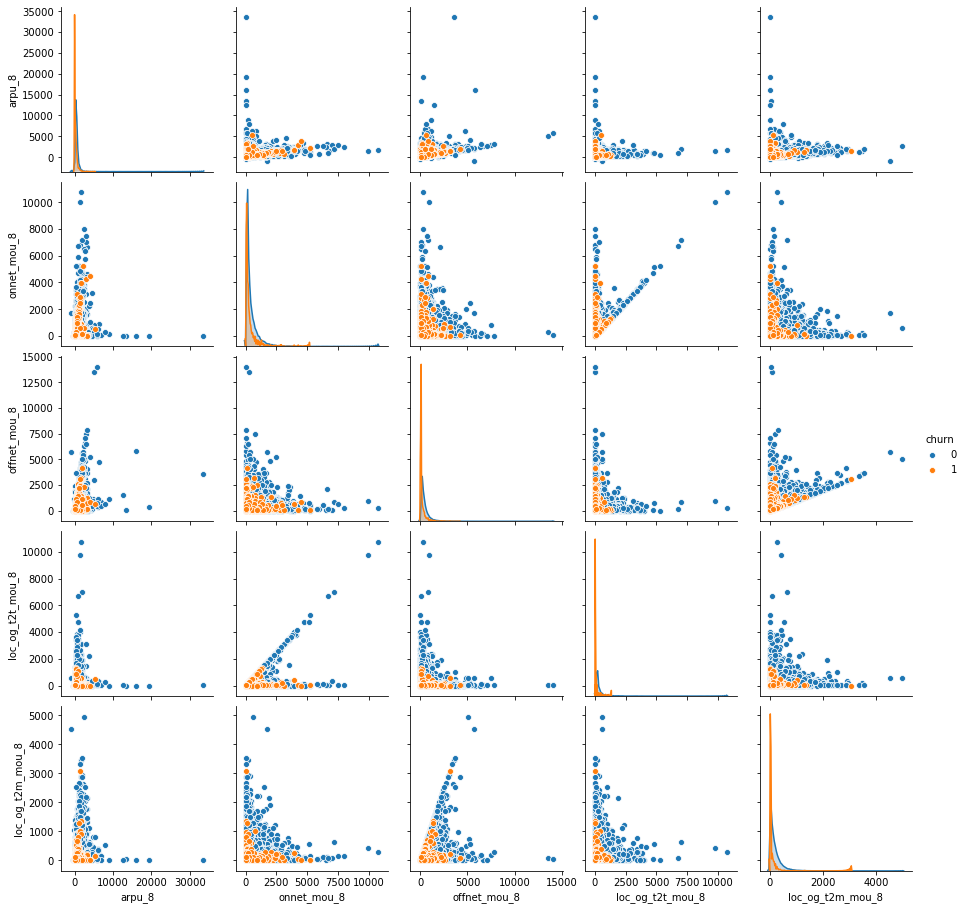

In [41]:
sns.pairplot(data=telecom_df[['arpu_8','onnet_mou_8','offnet_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','churn']],hue='churn')

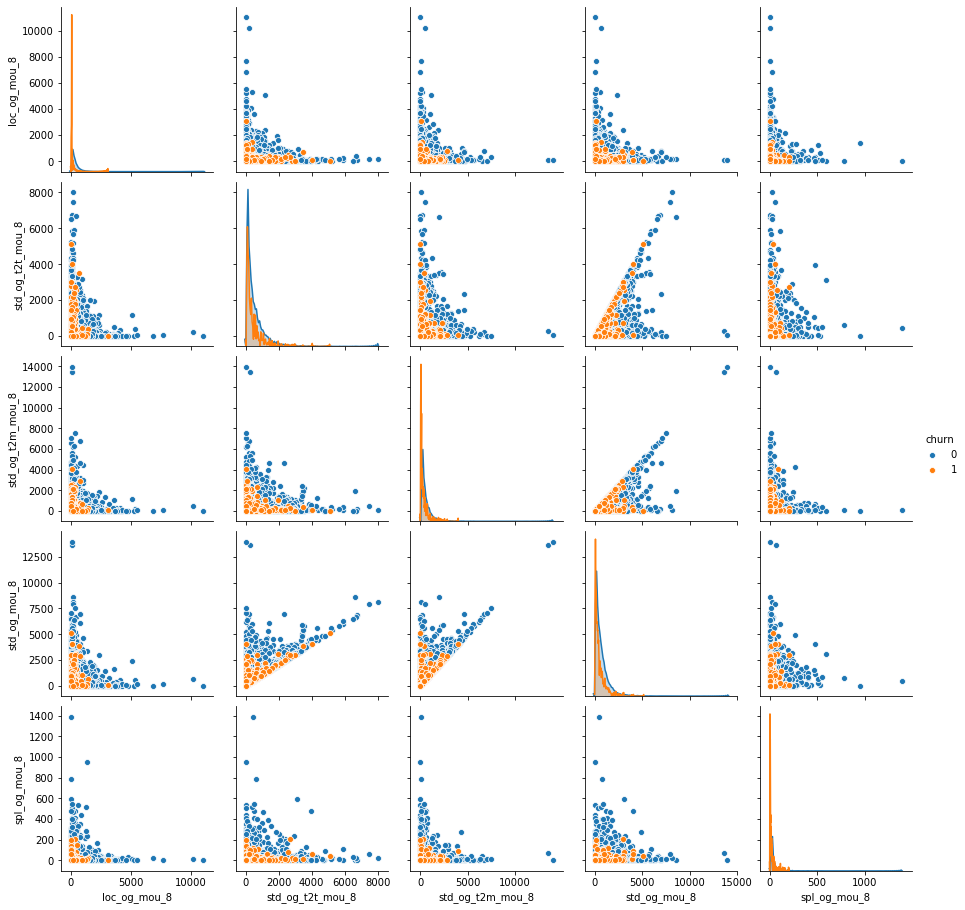

In [42]:
sns.pairplot(data=telecom_df[['loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_mou_8','spl_og_mou_8','churn']]
             ,hue='churn')

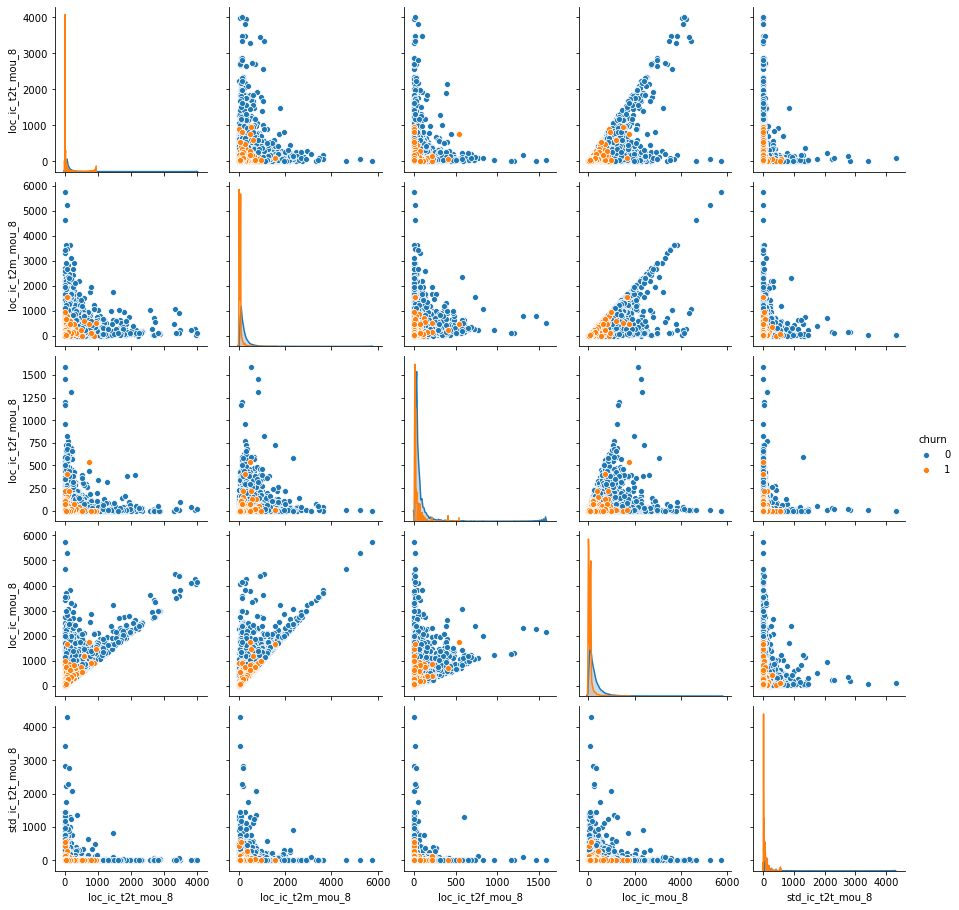

In [43]:
sns.pairplot(data=telecom_df[['churn','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8',
                              'std_ic_t2t_mou_8']],hue='churn')

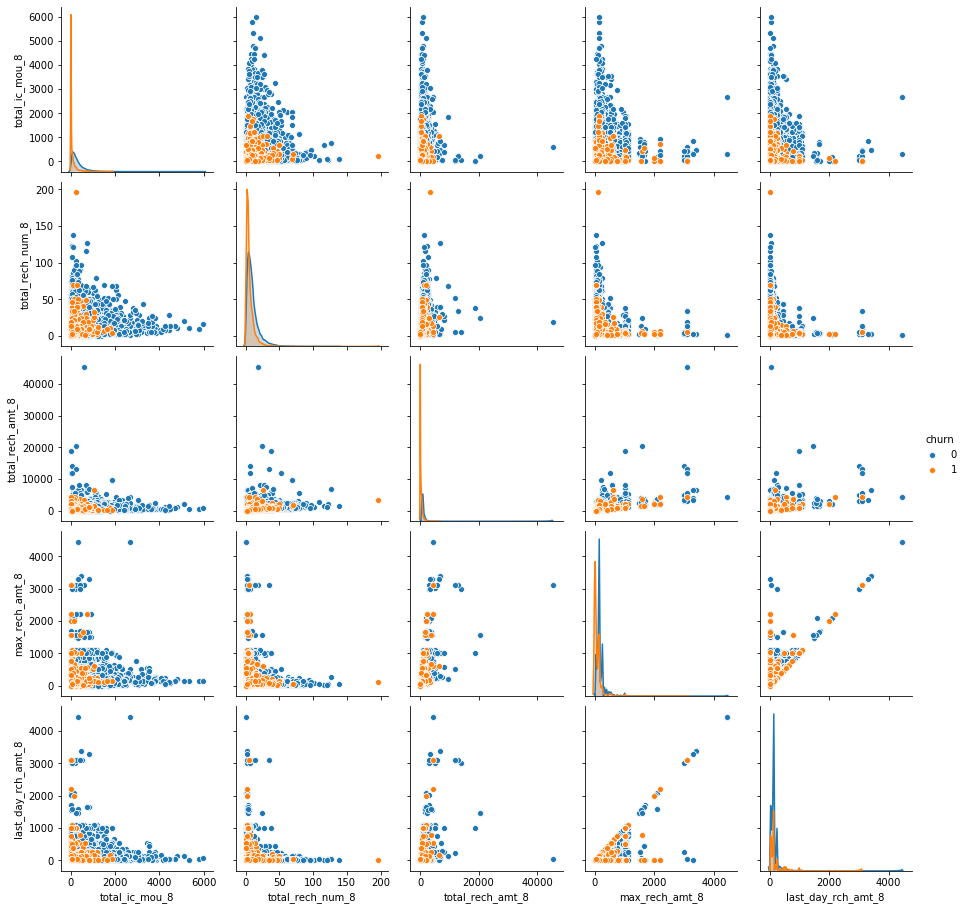

In [44]:
sns.pairplot(data=telecom_df[['churn','total_ic_mou_8','total_rech_num_8','total_rech_amt_8','max_rech_amt_8',
                              'last_day_rch_amt_8']],hue='churn')

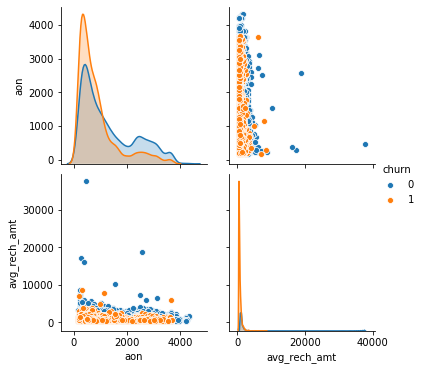

In [45]:
sns.pairplot(data=telecom_df[['churn','aon','avg_rech_amt']],hue='churn')

FROM ABOVE PLOTS WE CAN OBSERVE SOME CHURN POINTS EXIT IN VERY HIGH VALUES OF FEATURE, SO IF WE DO OUTLIERS TREATEMENT WE MAY LOOSE CHURN DATA

In [46]:
# FUNCTION TO PLOT CATAGORICAL VALUE vs COUNT
def countplot_sns(col,p):
    plt.subplot(8,5,p)
    sns.countplot(x=col,data=telecom_df)

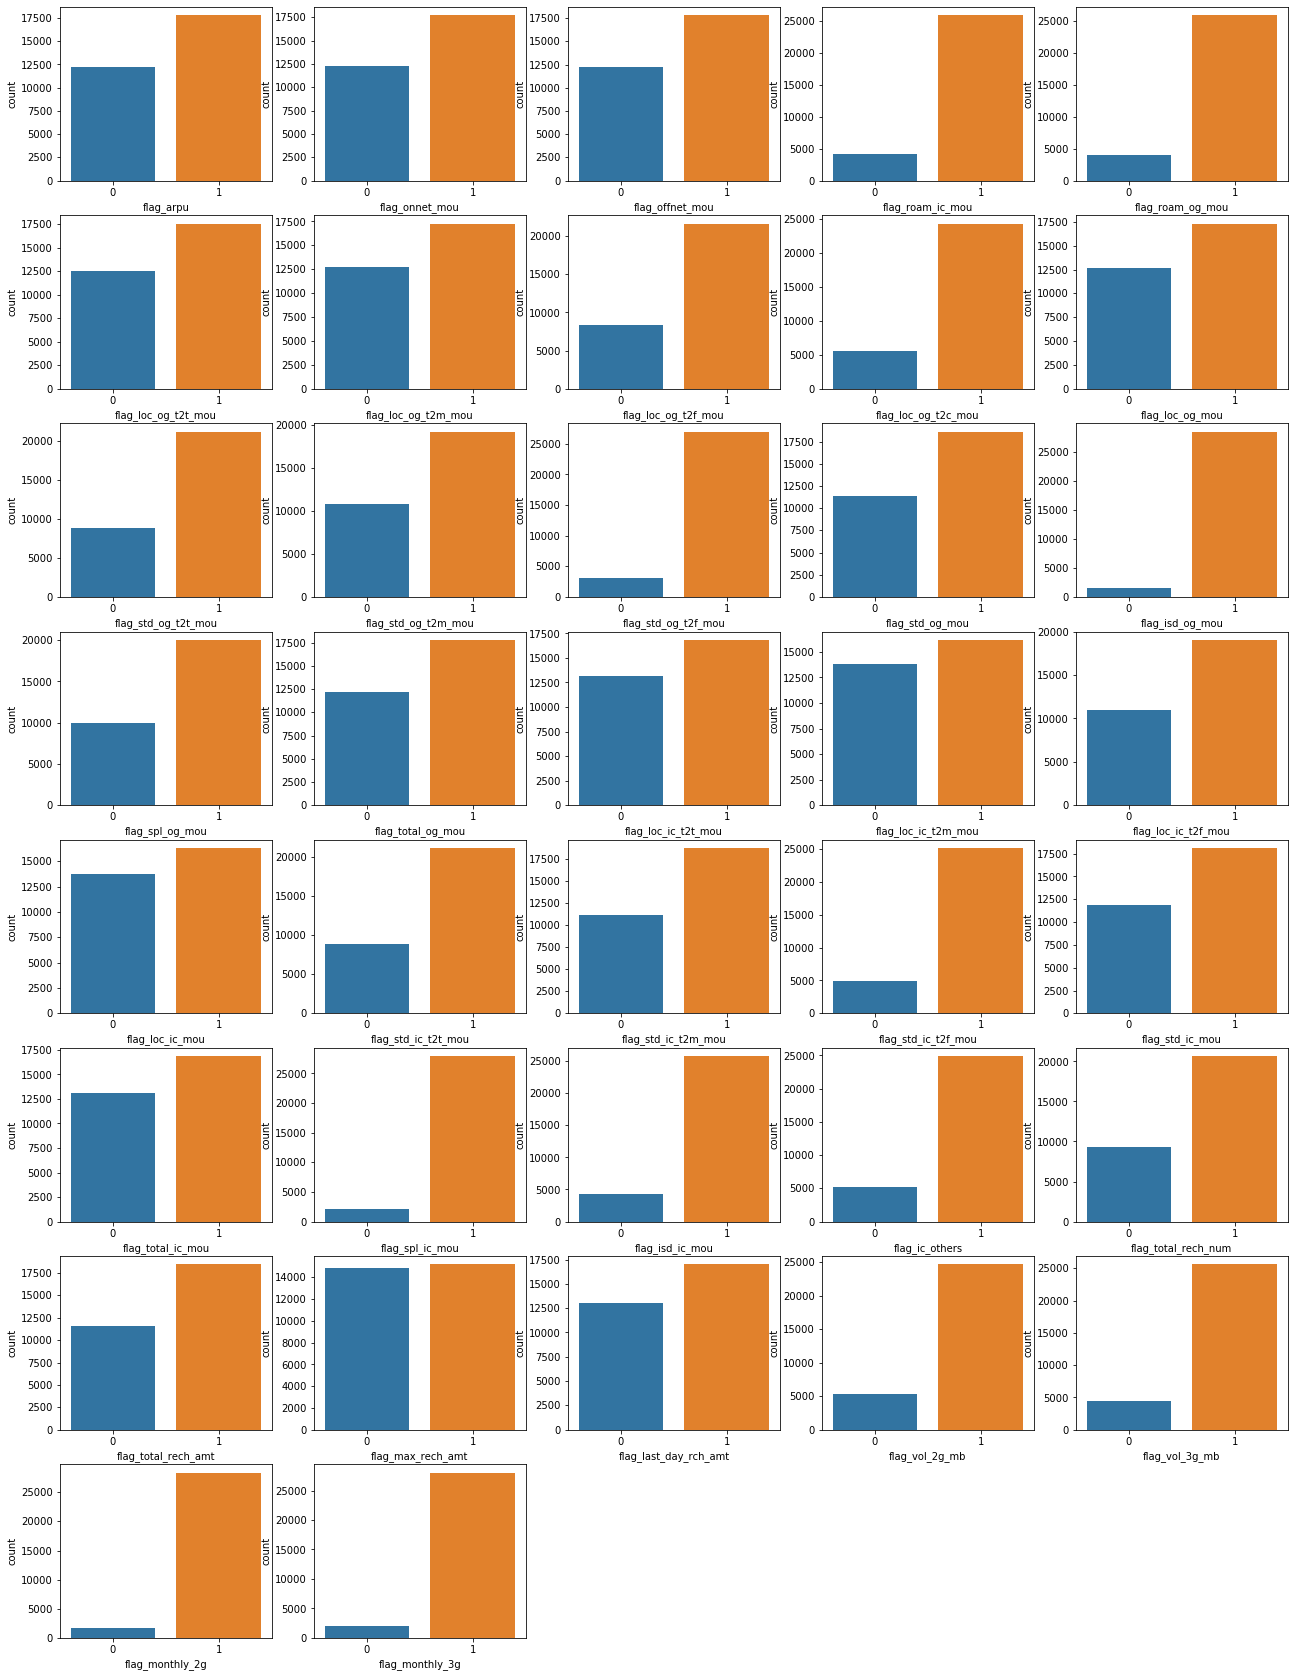

In [47]:
# 0 IS 8th MONTH DATA WHICH ARE GOOD CUSTOMERS AND 1 IS WHEN 8th MONTH IS LESSTHAN AVG OF 6&7 MONTH.
# FROM BELOW GRAPS WE CAN SAY WHICH FEATURE DONE BAD IN MONTH OF 8th
plt.figure(figsize=(22,30))
flag_col=list(telecom_df.filter(regex='flag'))
p=1
for f in flag_col:
    countplot_sns(f,p)
    p+=1

OBSERVATIONS:<br>
    THE GRAPHS WHICH HAD HUGE VARIANCE BETWEEN 0 & 1 ARE DOING VERY BAD IN 8th MONTH.<br>
    flag_montly_3g COLUMN ~500 USERS DOING GOOD IN 8th MONTH WHEN COMPARED TO 6 & 7 MONTHS

In [48]:
telecom_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,aon,avg_rech_amt,avg_arpu,avg_onnet_mou,avg_offnet_mou,avg_roam_ic_mou,avg_roam_og_mou,avg_loc_og_t2t_mou,avg_loc_og_t2m_mou,avg_loc_og_t2f_mou,avg_loc_og_t2c_mou,avg_loc_og_mou,avg_std_og_t2t_mou,avg_std_og_t2m_mou,avg_std_og_t2f_mou,avg_std_og_mou,avg_isd_og_mou,avg_spl_og_mou,avg_og_others,avg_total_og_mou,avg_loc_ic_t2t_mou,avg_loc_ic_t2m_mou,avg_loc_ic_t2f_mou,avg_loc_ic_mou,avg_std_ic_t2t_mou,avg_std_ic_t2m_mou,avg_std_ic_t2f_mou,avg_std_ic_mou,avg_total_ic_mou,avg_spl_ic_mou,avg_isd_ic_mou,avg_ic_others,avg_total_rech_num,avg_total_rech_amt,avg_max_rech_amt,avg_last_day_rch_amt,avg_vol_2g_mb,avg_vol_3g_mb,avg_monthly_2g,avg_monthly_3g,onnet_mou_7_6,offnet_mou_7_6,roam_ic_mou_7_6,roam_og_mou_7_6,loc_og_t2t_mou_7_6,loc_og_t2m_mou_7_6,loc_og_t2f_mou_7_6,loc_og_t2c_mou_7_6,loc_og_mou_7_6,std_og_t2t_mou_7_6,std_og_t2m_mou_7_6,std_og_t2f_mou_7_6,std_og_mou_7_6,isd_og_mou_7_6,spl_og_mou_7_6,og_others_7_6,total_og_mou_7_6,loc_ic_t2t_mou_7_6,loc_ic_t2m_mou_7_6,loc_ic_t2f_mou_7_6,loc_ic_mou_7_6,std_ic_t2t_mou_7_6,std_ic_t2m_mou_7_6,std_ic_t2f_mou_7_6,std_ic_mou_7_6,total_ic_mou_7_6,spl_ic_mou_7_6,isd_ic_mou_7_6,ic_others_7_6,total_rech_num_7_6,total_rech_amt_7_6,max_rech_amt_7_6,last_day_rch_amt_7_6,vol_2g_mb_7_6,vol_3g_mb_7_6,monthly_2g_7_6,monthly_3g_7_6,onnet_mou_8_7,offnet_mou_8_7,roam_ic_mou_8_7,roam_og_mou_8_7,loc_og_t2t_mou_8_7,loc_og_t2m_mou_8_7,loc_og_t2f_mou_8_7,loc_og_t2c_mou_8_7,loc_og_mou_8_7,std_og_t2t_mou_8_7,std_og_t2m_mou_8_7,std_og_t2f_mou_8_7,std_og_mou_8_7,isd_og_mou_8_7,spl_og_mou_8_7,total_og_mou_8_7,loc_ic_t2t_mou_8_7,loc_ic_t2m_mou_8_7,loc_ic_t2f_mou_8_7,loc_ic_mou_8_7,std_ic_t2t_mou_8_7,std_ic_t2m_mou_8_7,std_ic_t2f_mou_8_7,std_ic_mou_8_7,total_ic_mou_8_7,spl_ic_mou_8_7,isd_ic_mou_8_7,ic_others_8_7,total_rech_num_8_7,total_rech_amt_8_7,max_rech_amt_8_7,last_day_rch_amt_8_7,vol_2g_mb_8_7,vol_3g_mb_8_7,monthly_2g_8_7,monthly_3g_8_7
count,3.001100e+04,30011.000000,30011.00000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011

In [49]:
import warnings
warnings.filterwarnings("ignore")

# MODEL BUILDING

In [50]:
# STORING MOBILE NUMBER TO SEPEARTE COLUMN IT IS UNIQUE VALUE IT WILL NOT ADD ANY VALUE TO MODEL.
mobile_number=telecom_df.pop('mobile_number')

In [51]:
# CREATING INDEPENDENT AND DEPENDENT VARIABLES FROM  THE DATASET
y_telecom_df=telecom_df.pop('churn')
x_telecom_df=telecom_df
print(y_telecom_df.shape)
print(x_telecom_df.shape)

(30011,)
(30011, 187)


#### TRAIN TEST SPLIT

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_telecom_df,y_telecom_df, train_size=0.7,test_size=0.3,random_state=100)
print('Train')
print(x_train.shape,y_train.shape)
print('Test')
print(x_test.shape,y_test.shape)

Train
(21007, 187) (21007,)
Test
(9004, 187) (9004,)


#### SCALLING THE DATA

In [53]:
scaller=StandardScaler()
x_train_scale=scaller.fit_transform(x_train)
x_test_scale=scaller.transform(x_test)

### PCA

#### PCA TO GET LESS FEATURES WITH OUT LOOSING DATA.

In [54]:
pca = PCA(svd_solver='randomized',random_state=42)

In [55]:
# DOING THE PCA ON THE TRAIN DATA WE SHOULD NOT EXPOSE TEST DATA.
pca.fit(x_train_scale)

PCA(random_state=42, svd_solver='randomized')

In [56]:
pca.components_

array([[ 1.90592100e-01,  1.26555295e-01,  1.65061939e-01, ...,
        -4.06403601e-02, -1.90263768e-02, -3.83863736e-02],
       [ 7.48307858e-02,  1.42206477e-01,  1.01809526e-01, ...,
         6.43143881e-02,  3.88777026e-02,  4.84018342e-02],
       [ 9.49542245e-02, -2.06310718e-02,  3.88442822e-02, ...,
        -4.33371463e-02, -1.52434995e-02, -4.32255238e-02],
       ...,
       [-0.00000000e+00,  1.97478596e-03,  6.70990361e-02, ...,
         1.04083409e-16, -2.60208521e-17,  1.17961196e-16],
       [ 0.00000000e+00,  5.94821619e-02, -4.24415909e-02, ...,
        -5.29090660e-17, -5.89805982e-17,  1.11889664e-16],
       [-0.00000000e+00, -6.81222682e-03,  5.00256714e-03, ...,
        -9.97465999e-18, -3.37186876e-17, -3.29597460e-17]])

In [57]:
pca.explained_variance_ratio_

array([6.90022925e-02, 4.70362786e-02, 4.61783830e-02, 3.34462510e-02,
       2.83415697e-02, 2.34726408e-02, 2.26856017e-02, 1.94361877e-02,
       1.87685662e-02, 1.81832772e-02, 1.72879929e-02, 1.63041192e-02,
       1.56026350e-02, 1.55211756e-02, 1.41293892e-02, 1.40468133e-02,
       1.37602016e-02, 1.35026012e-02, 1.34003225e-02, 1.26925056e-02,
       1.23554859e-02, 1.19870525e-02, 1.18554079e-02, 1.15646715e-02,
       1.14215314e-02, 1.13136139e-02, 1.12072335e-02, 1.08825515e-02,
       1.04132565e-02, 1.02965386e-02, 1.00159714e-02, 9.68601667e-03,
       9.35097278e-03, 9.17537075e-03, 8.84949715e-03, 8.63808727e-03,
       8.61023008e-03, 8.42447749e-03, 8.21962354e-03, 8.07821496e-03,
       7.89528079e-03, 7.79155017e-03, 7.52747495e-03, 7.47979452e-03,
       7.29275394e-03, 7.28426714e-03, 7.10282684e-03, 6.90087787e-03,
       6.78173394e-03, 6.59850512e-03, 6.52131712e-03, 6.44776410e-03,
       6.16312671e-03, 6.02620702e-03, 5.93682352e-03, 5.91766407e-03,
      

In [58]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

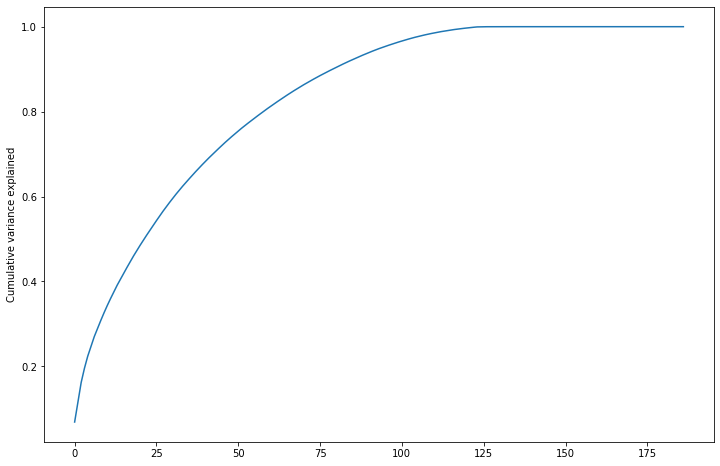

In [59]:
# PLOTTING GRAPH BETWEEN VARIANCE vs FEATURES
# 83% OF VARIANCE COVERED BY 75 FEATURES
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [60]:
# USING INCREMENTAL PCA FOR EFFICIENCY FOR  LARGER DATASETS
pca_final = IncrementalPCA(n_components=75)

In [61]:
# FROM TRAIN DATA WE GET 75 FEATURES WITH OUT LOOSING VARIANCE
x_train_scale_pca = pca_final.fit_transform(x_train_scale)
x_train_scale_pca.shape

(21007, 75)

In [62]:
# APPLYING SELECTED COMPONENTS TO THE TEST DATA
x_test_scale_pca = pca_final.transform(x_test_scale)
x_test_scale_pca.shape

(9004, 75)

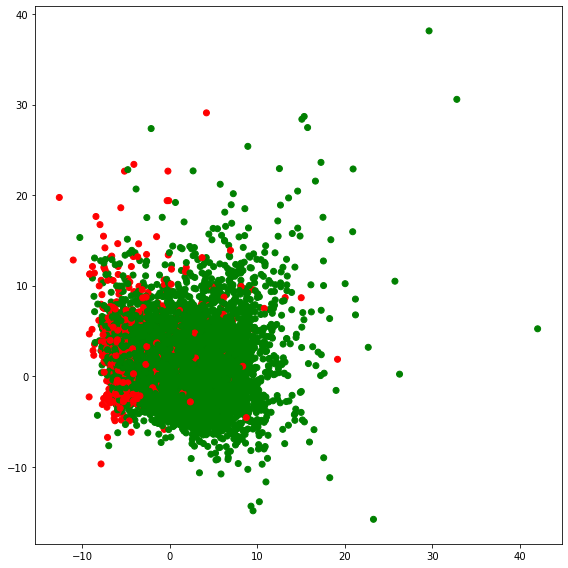

In [67]:
# BELOW WE CAN OBSERVE CHURN AND NON CHURN DISTRIBUTION
fig = plt.figure(figsize = (8,8))
plt.scatter(x_train_scale_pca[:,0], x_train_scale_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.tight_layout()
plt.show()

# Logistic Regression WITH PCA

### HYPERPARAMETER TUNING - PCA AND LOGISTIC REGRESSION

In [68]:
pca = PCA()
# The class weight is used to handle class imbalance.
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)]
# compile pipeline
pca_logistic = Pipeline(steps)
# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [69]:
# fit model
model.fit(x_train_scale_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   30.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [70]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8774958104289237
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [73]:
# predict churn on test data
y_pred = model.predict(x_test_scale_pca)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
TN = cm[0,0] # true positive 
TP = cm[1,1] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
print('Accuracy Score           : ', round(100*accuracy_score(y_test,y_pred)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity              : ', round(100*TP/float(TP+FN),2))
# Let us calculate specificity
print('Specificity              : ',round(100*TN/float(TN+FP),2))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate       : ',round(100*FP/ float(TN+FP)))
# positive predictive value 
print('positive predictive value: ', round(100*TP / float(TP+FP)))
# Negative predictive value
print('Negative predictive value: ',round(100*TN / float(TN+ FN)))
# Misclassification rate
print('Misclassification Rate   : ',round(100*(FN+FP)/(TP+TN+FP+FN)))
#precision
print('precision                : ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall                   : ',round(100*TP/float(TP+ FN)))
# check area under curve
y_pred_prob = model.predict_proba(x_test_scale_pca)[:, 1]
print('AUC                      : ', round(100*roc_auc_score(y_test, y_pred_prob),2))

[[6655 1579]
 [ 106  664]]
Accuracy Score           :  81.0
Sensitivity              :  86.23
Specificity              :  80.82
false postive rate       :  19.0
positive predictive value:  30.0
Negative predictive value:  98.0
Misclassification Rate   :  19.0
precision                :  30.0
Recall                   :  86.0
AUC                      :  89.87


# RANDOM FOREST WITH PCA

In [74]:
# Tthe class weight is used to handle class imbalance
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)
# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [75]:
# fit model
model.fit(x_train_scale_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [76]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8965515129230102
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [82]:
# predict churn on test data
y_pred = model.predict(x_test_scale_pca)
# create onfusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(100*sensitivity, 2), "\n", "Specificity: \t", round(100*specificity, 2), sep='')
# check area under curve
y_pred_prob = model.predict_proba(x_test_scale_pca)[:, 1]
print("AUC:           ", round(100*roc_auc_score(y_test, y_pred_prob),2))

[[8144   90]
 [ 552  218]]
Sensitivity: 	28.31
Specificity: 	98.91
AUC:            91.75


SENSITIVITYIS TOO LOW. THE BEST MODEL IS PCA ALONG WITH LOGISTIC REGRESSION.

# DECISIONTREECLASSIFIER WITH PCA

In [83]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(x_train_scale_pca,y_train)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 36.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [84]:
y_pred_default = grid_search.predict(x_test_scale_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6971, 1263],
       [ 214,  556]], dtype=int64)

In [85]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))
#precision
print('precision: ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall: ',round(100*TP/float(TP+ FN)))

Sensitivity:  0.7220779220779221
Specificity:  0.8466116103959194
false postive rate:  0.15338838960408063
positive predictive value:  0.30566245189664654
Negative predictive value:  0.9702157272094641
Misclassification Rate:  0.16403820524211463
precision:  31.0
Recall:  72.0


#### BEST MODEL IN LOGISTIC,RANDOMFOREST AND DECISION MODEL ALONG WITH PCA 

LOGISTIC MODEL PERFORMED GOOD WEN COMPARED TO OTHER MODELS IN TERMS OF PRECISION,SENSITICITY TERMS.<BR>
Accuracy Score           :  81.0 <BR>
Sensitivity              :  86.23<BR>
Specificity              :  80.82<BR>
false postive rate       :  19.0<BR>
positive predictive value:  30.0<BR>
Negative predictive value:  98.0<BR>
Misclassification Rate   :  19.0<BR>
precision                :  30.0<BR>
Recall                   :  86.0<BR>
AUC                      :  89.87<BR>

# RANDOMFOREST ON ALL FEATURE

In [86]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [87]:
# fit
rfc.fit(x_train_scale,y_train)

RandomForestClassifier(class_weight='balanced')

In [88]:
# Making predictions
predictions = rfc.predict(x_test_scale)

In [89]:
# Importing classification report and confusion matrix from sklearn metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.79      0.45      0.57       770

    accuracy                           0.94      9004
   macro avg       0.87      0.72      0.77      9004
weighted avg       0.94      0.94      0.94      9004

[[8142   92]
 [ 426  344]]
0.9424700133274101


In [90]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[8142,   92],
       [ 426,  344]], dtype=int64)

In [91]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives
print('Accuracy Score           : ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity              : ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity              : ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate       : ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
# Misclassification rate
print('Misclassification Rate   : ',(FN+FP)/(TP+TN+FP+FN))
#precision
print('precision                : ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall                   : ',round(100*TP/float(TP+ FN)))

Accuracy Score           :  0.9424700133274101
Sensitivity              :  0.44675324675324674
Specificity              :  0.9888268156424581
false postive rate       :  0.0111731843575419
positive predictive value:  0.7889908256880734
Negative predictive value:  0.9502801120448179
Misclassification Rate   :  0.05752998667258996
precision                :  79.0
Recall                   :  45.0


### HYPERPARAMETER TUNING

In [92]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)

In [93]:
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [94]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.631942,0.034740,0.121649,0.004262,2,{'max_depth': 2},0.875059,0.868872,0.884075,0.875744,0.874792,0.875708,0.004858,4,0.876525,0.874442,0.875699,0.875997,0.880995,0.876732,0.002239
1,21.221076,0.617620,0.201496,0.021365,7,{'max_depth': 7},0.915516,0.913375,0.919543,0.911212,0.913592,0.914648,0.002802,3,0.929307,0.931925,0.930501,0.926276,0.930084,0.929619,0.001875
2,29.558440,0.646386,0.197118,0.019113,12,{'max_depth': 12},0.934793,0.931699,0.936682,0.933349,0.931207,0.933546,0.002015,2,0.969771,0.969414,0.969059,0.968642,0.969892,0.969355,0.000461
3,32.398387,1.949146,0.206874,0.050078,17,{'max_depth': 17},0.939791,0.935983,0.940014,0.938110,0.935015,0.937783,0.002001,1,0.982267,0.981196,0.980781,0.980721,0.981138,0.981221,0.000556


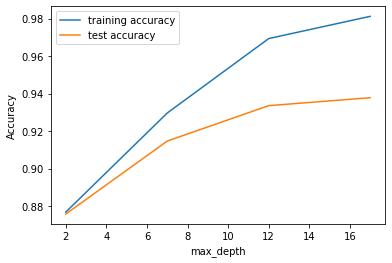

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
# GridSearchCV to find optimal n_estimators
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy')

In [97]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.751313,1.257518,0.180175,0.002788,100,{'n_estimators': 100},0.934079,0.925988,0.934777,0.932397,0.929065,0.931261,0.003293,1,0.959536,0.959774,0.958646,0.958348,0.960193,0.959299,0.000694
1,128.558317,0.185298,0.868084,0.051745,500,{'n_estimators': 500},0.932651,0.927416,0.931683,0.929541,0.929065,0.930071,0.001876,3,0.960190,0.960131,0.957813,0.957753,0.960431,0.959264,0.001213
2,216.414474,26.462457,1.509272,0.301276,900,{'n_estimators': 900},0.932413,0.928129,0.931683,0.930017,0.929541,0.930357,0.001532,2,0.959774,0.961083,0.958527,0.958348,0.960907,0.959728,0.001147


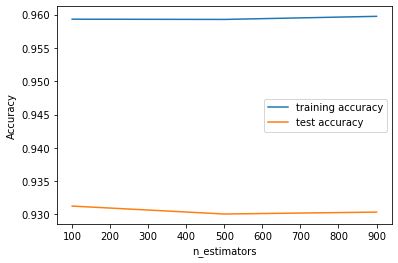

In [98]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [100]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.931044,0.461137,0.158998,0.020992,4,{'max_features': 4},0.925512,0.916944,0.924066,0.921923,0.922399,0.922169,0.002905,5,0.948765,0.949301,0.945317,0.946745,0.949542,0.947934,0.001637
1,11.174543,0.484067,0.143068,0.004471,8,{'max_features': 8},0.928605,0.925988,0.928588,0.925970,0.926922,0.927215,0.001180,4,0.956263,0.956858,0.954540,0.955373,0.958289,0.956265,0.001282
2,18.458560,0.539697,0.143873,0.010480,14,{'max_features': 14},0.931937,0.928843,0.932397,0.930017,0.928826,0.930404,0.001510,3,0.959238,0.959774,0.957872,0.957634,0.958586,0.958621,0.000806
3,27.987728,2.535596,0.162616,0.022831,20,{'max_features': 20},0.932651,0.927891,0.932635,0.930017,0.928826,0.930404,0.001948,2,0.960428,0.961559,0.959776,0.958527,0.960550,0.960168,0.001000
4,32.301289,2.391642,0.135414,0.004101,24,{'max_features': 24},0.931937,0.931699,0.933587,0.931445,0.930017,0.931737,0.001141,1,0.961202,0.961619,0.959360,0.961085,0.961323,0.960918,0.000799


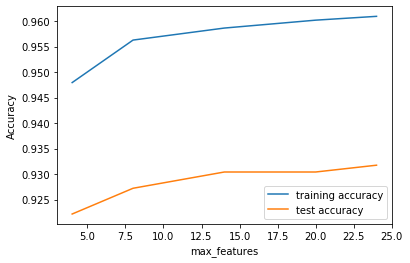

In [101]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [100]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.493170,0.271771,0.063028,0.001092,100,{'min_samples_leaf': 100},0.885531,0.887911,0.896215,0.886694,0.891930,0.889656,0.003925,1,0.895091,0.900922,0.897715,0.895573,0.896644,0.897189,0.002075
1,6.733730,0.172033,0.059358,0.006247,150,{'min_samples_leaf': 150},0.881485,0.882437,0.891692,0.881457,0.889550,0.885324,0.004392,2,0.888307,0.891639,0.886767,0.885458,0.892717,0.888978,0.002786
2,6.107309,0.194066,0.078462,0.013589,200,{'min_samples_leaf': 200},0.880295,0.881247,0.888836,0.878838,0.884075,0.882658,0.003531,3,0.886938,0.888188,0.885458,0.883732,0.886350,0.886133,0.001493
3,5.789281,0.184198,0.062481,0.009878,250,{'min_samples_leaf': 250},0.876249,0.878867,0.885027,0.876934,0.882409,0.879897,0.003340,4,0.882475,0.885927,0.881173,0.880400,0.884149,0.882825,0.002005
4,6.007147,0.496170,0.064208,0.017166,300,{'min_samples_leaf': 300},0.878391,0.874822,0.881219,0.874316,0.879314,0.877612,0.002652,5,0.883071,0.881523,0.877187,0.878436,0.882304,0.880504,0.002287


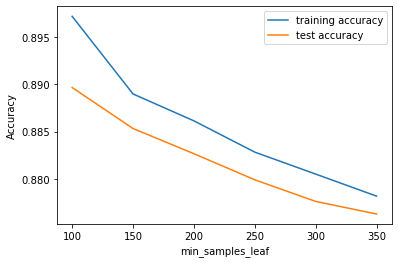

In [101]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(100, 700, 50)},
             return_train_score=True, scoring='accuracy')

In [103]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.860503,0.281936,0.073591,0.009601,100,{'min_samples_split': 100},0.924084,0.920990,0.924780,0.922637,0.921209,0.922740,0.001509,1,0.946028,0.946802,0.944663,0.946150,0.947162,0.946161,0.000857
1,11.318592,0.413550,0.083551,0.012880,150,{'min_samples_split': 150},0.912661,0.912661,0.913830,0.910498,0.913592,0.912648,0.001176,2,0.931330,0.931806,0.929549,0.929489,0.930323,0.930499,0.000933
2,10.424485,0.840771,0.072244,0.006606,200,{'min_samples_split': 200},0.906473,0.905997,0.910974,0.903118,0.909783,0.907269,0.002812,3,0.921690,0.922523,0.919612,0.921338,0.922409,0.921514,0.001049
3,10.160453,0.740957,0.072459,0.013569,250,{'min_samples_split': 250},0.901951,0.902189,0.907879,0.897881,0.903594,0.902699,0.003214,4,0.914549,0.913835,0.913424,0.910925,0.912710,0.913089,0.001235
4,9.242699,0.287862,0.062493,0.000009,300,{'min_samples_split': 300},0.896240,0.895288,0.902404,0.896929,0.901452,0.898463,0.002893,5,0.908480,0.909134,0.906640,0.905926,0.909021,0.907840,0.001310


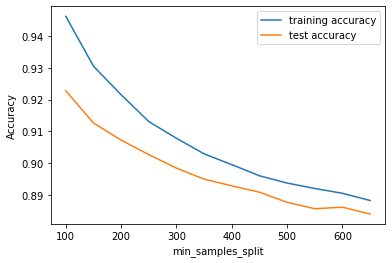

In [104]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
# model with the best hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1,return_train_score=True)

In [106]:
# fit
grid_search.fit(x_train_scale,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 29.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'max_features': [15, 20],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [300, 400, 500]},
             refit='recall_score', return_train_score=True, verbose=1)

In [107]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8850382996452235 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 300}


In [108]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

In [109]:
# fit
rfc_final.fit(x_train_scale,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=150, min_samples_split=300,
                       n_estimators=500)

In [110]:
# predict
predictions = rfc_final.predict(x_test_scale)

In [111]:
confusion_rm_f = confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7367,  867],
       [ 126,  644]], dtype=int64)

In [113]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives
print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))
#precision
print('precision: ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall: ',round(100*TP/float(TP+ FN)))

Accuracy Score:  0.8897156819191471
Sensitivity:  0.8363636363636363
Specificity:  0.8947048821957736
false postive rate:  0.10529511780422637
positive predictive value:  0.4262078093977498
Negative predictive value:  0.9831843053516616
Misclassification Rate:  0.11028431808085296
precision:  43.0
Recall:  84.0


In [116]:
#Important Variables
feature_names=list(x_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [117]:
telecom_df.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       ...
       'flag_isd_ic_mou', 'flag_ic_others', 'flag_total_rech_num',
       'flag_total_rech_amt', 'flag_max_rech_amt', 'flag_last_day_rch_amt',
       'flag_vol_2g_mb', 'flag_vol_3g_mb', 'flag_monthly_2g',
       'flag_monthly_3g'],
      dtype='object', length=187)

In [119]:
#Variable Importance top 30 variable
dic= dict(d_descending)
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=12
n_items = take(n, dic.items())

In [120]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('total_ic_mou_8', 0.08614900164651447), ('total_og_mou_8', 0.06220764749423823), ('total_rech_amt_8', 0.06185041835159021), ('last_day_rch_amt_8', 0.058469919955965635), ('loc_ic_t2m_mou_8', 0.04918358823942643), ('arpu_8', 0.046809760345529916), ('loc_ic_mou_8', 0.04269344072157775), ('loc_og_mou_8', 0.04248000877221151), ('loc_og_t2m_mou_8', 0.03753975021666684), ('loc_ic_t2t_mou_8', 0.026210072236167097), ('loc_og_t2t_mou_8', 0.02619291697322945), ('total_og_mou_8_7', 0.02603002305593623)]


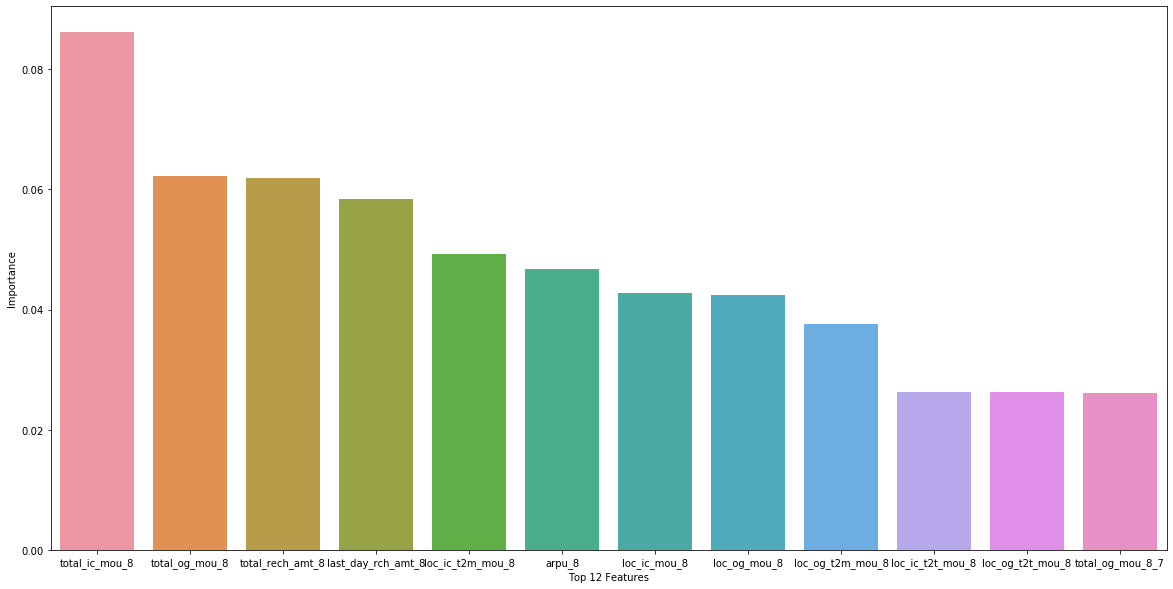

In [122]:
imp=rfc_final.feature_importances_
names=x_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

## OBSERVATIONS TO BUSINESS

THE FALLOWING FEATURES ARE IMPORTANT FOR CHURN IDENTIFICATION.<br> 
•total_ic_mou_8       <br> 
•total_og_mou_8<br> 
•total_rech_amt_8<br> 
•last_day_rch_amt_8<br> 
•loc_ic_t2m_mou_8<br> 
•arpu_8<br> 
•loc_ic_mou_8<br> 
•loc_og_mou_8<br> 
•loc_og_t2m_mou_8<br> 
•loc_ic_t2t_mou_8<br> 
•loc_og_t2t_mou_8<br> 
•total_og_mou_8_7<br> 
-->The Total minutes of usage for incoming and out going calls in a circle is key for identifying churn.<br> 
-->When customer had low recharge than usual, the last day recharge amount is less for churn.<br> 
-->The difference between out going calls for bad phase (8th Month) is less than good phase 7th Month.